# ----------------------
# Reproducing the World Happiness Report Analysis with Python 
# Author: - Evgeniy Alkhovik , Anastazja Olszewska, Merve Kiratli
# Date: 2023-06-18
# ----------------------

## Introduction

In this project, we reproduce the analysis from an article published in the Undergraduate Economic Review, titled "Happiness and Economic Growth: An Analysis of the World Happiness Report." The article examines whether economic indicators, such as GDP per capita and unemployment rates, have an impact on the happiness scores of countries.

"""
This script performs an exploratory data analysis using various Python libraries such as pandas,
numpy, missingno, plotly, and scipy. We'll first import necessary libraries, load the dataset, and 
then proceed to clean and analyze the data.
"""

### Loading Datasets & Importing Necessary Libraries

In [1]:
import os
import pandas as pd 
import numpy as np

import missingno as msno
import plotly.graph_objects as go
import utils, config
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

"""
In this part of the script, we're loading our datasets from 2020, 2021, and 2022. These datasets 
contain the World Happiness Report data for each year. After loading the data, we take a quick 
peek at the first few records of each dataset using the .head() method. 
Finally, we use the .info() method on the 2022 dataset to understand its structure better. This 
includes the number of entries, the columns available, and the datatype of each column.
"""

In [2]:
# Load World Happiness Report data for each year
wh_df_2022 = pd.read_csv('data/2022.csv').iloc[:-1,1:]
wh_df_2021 = pd.read_csv('data/2021.csv')
wh_df_2020 = pd.read_csv('data/2020.csv')

In [3]:
# Print the first few records of each year's data
wh_df_2022.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [4]:
wh_df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
wh_df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [6]:
# Display the structure and additional information of the 2022 data
wh_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     146 non-null    object
 1   Happiness score                             146 non-null    object
 2   Whisker-high                                146 non-null    object
 3   Whisker-low                                 146 non-null    object
 4   Dystopia (1.83) + residual                  146 non-null    object
 5   Explained by: GDP per capita                146 non-null    object
 6   Explained by: Social support                146 non-null    object
 7   Explained by: Healthy life expectancy       146 non-null    object
 8   Explained by: Freedom to make life choices  146 non-null    object
 9   Explained by: Generosity                    146 non-null    object
 10  Explained by: Perceptions 

In [7]:
# List the columns of the 2022 data
wh_df_2022.columns[1:]

Index(['Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

## Data Preparation and Cleaning

"""
In this segment of the code, we're taking a few additional steps to clean and prepare our data 
for analysis. First, we list the columns of the 2022 data to confirm their names and order. 

Next, we iterate over each of these columns (excluding 'Country') and perform two transformations: 
- We replace commas in the data with periods to standardize decimal point representation.
- We convert the data in each column to numeric format to facilitate calculations and statistical analysis.

After that, we remove trailing asterisks from country names in the 'Country' column to standardize the country names.

With our data cleaned and prepared, we can start some exploratory analysis. 
We visualize the top 10 happiest countries, the least 10 happy countries, and we even create a map 
to represent the happiness score on a global scale.

Finally, we build a correlation matrix of the 2022 data to understand the relationships between variables.
We also map the region indicators from the 2021 data to the 2022 data to facilitate regional analyses.
"""

In [8]:
# Replace commas with periods and convert data to numeric format
for column in wh_df_2022.columns[1:]:
    wh_df_2022[column] = wh_df_2022[column].str.replace(',', '.')
    wh_df_2022[column] = pd.to_numeric(wh_df_2022[column])

In [9]:
# Standardize country names by removing trailing asterisks
wh_df_2022['Country'] = wh_df_2022['Country'].str.rstrip('*')

#### Adding the 'Region' Column
 - As per the World Happiness Report 2022 dataset, the region information is missing. However, the 2021 dataset provides this information. We assume that the region of a country hasn't changed from 2021 to 2022. Therefore, we utilize the region data from the 2021 dataset to fill in the missing 'Region' information for 2022.

In [10]:
# Map region indicators from 2021 data to 2022 data
region_mapping = dict(zip(wh_df_2021['Country name'], wh_df_2021['Regional indicator']))

In [11]:
wh_df_2022['Region'] = wh_df_2022['Country'].map(region_mapping)

In [12]:
# Handling missing values
# Checking for missing values in the dataset
missing_values = wh_df_2022.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Region                                        3
dtype: int64


<Axes: >

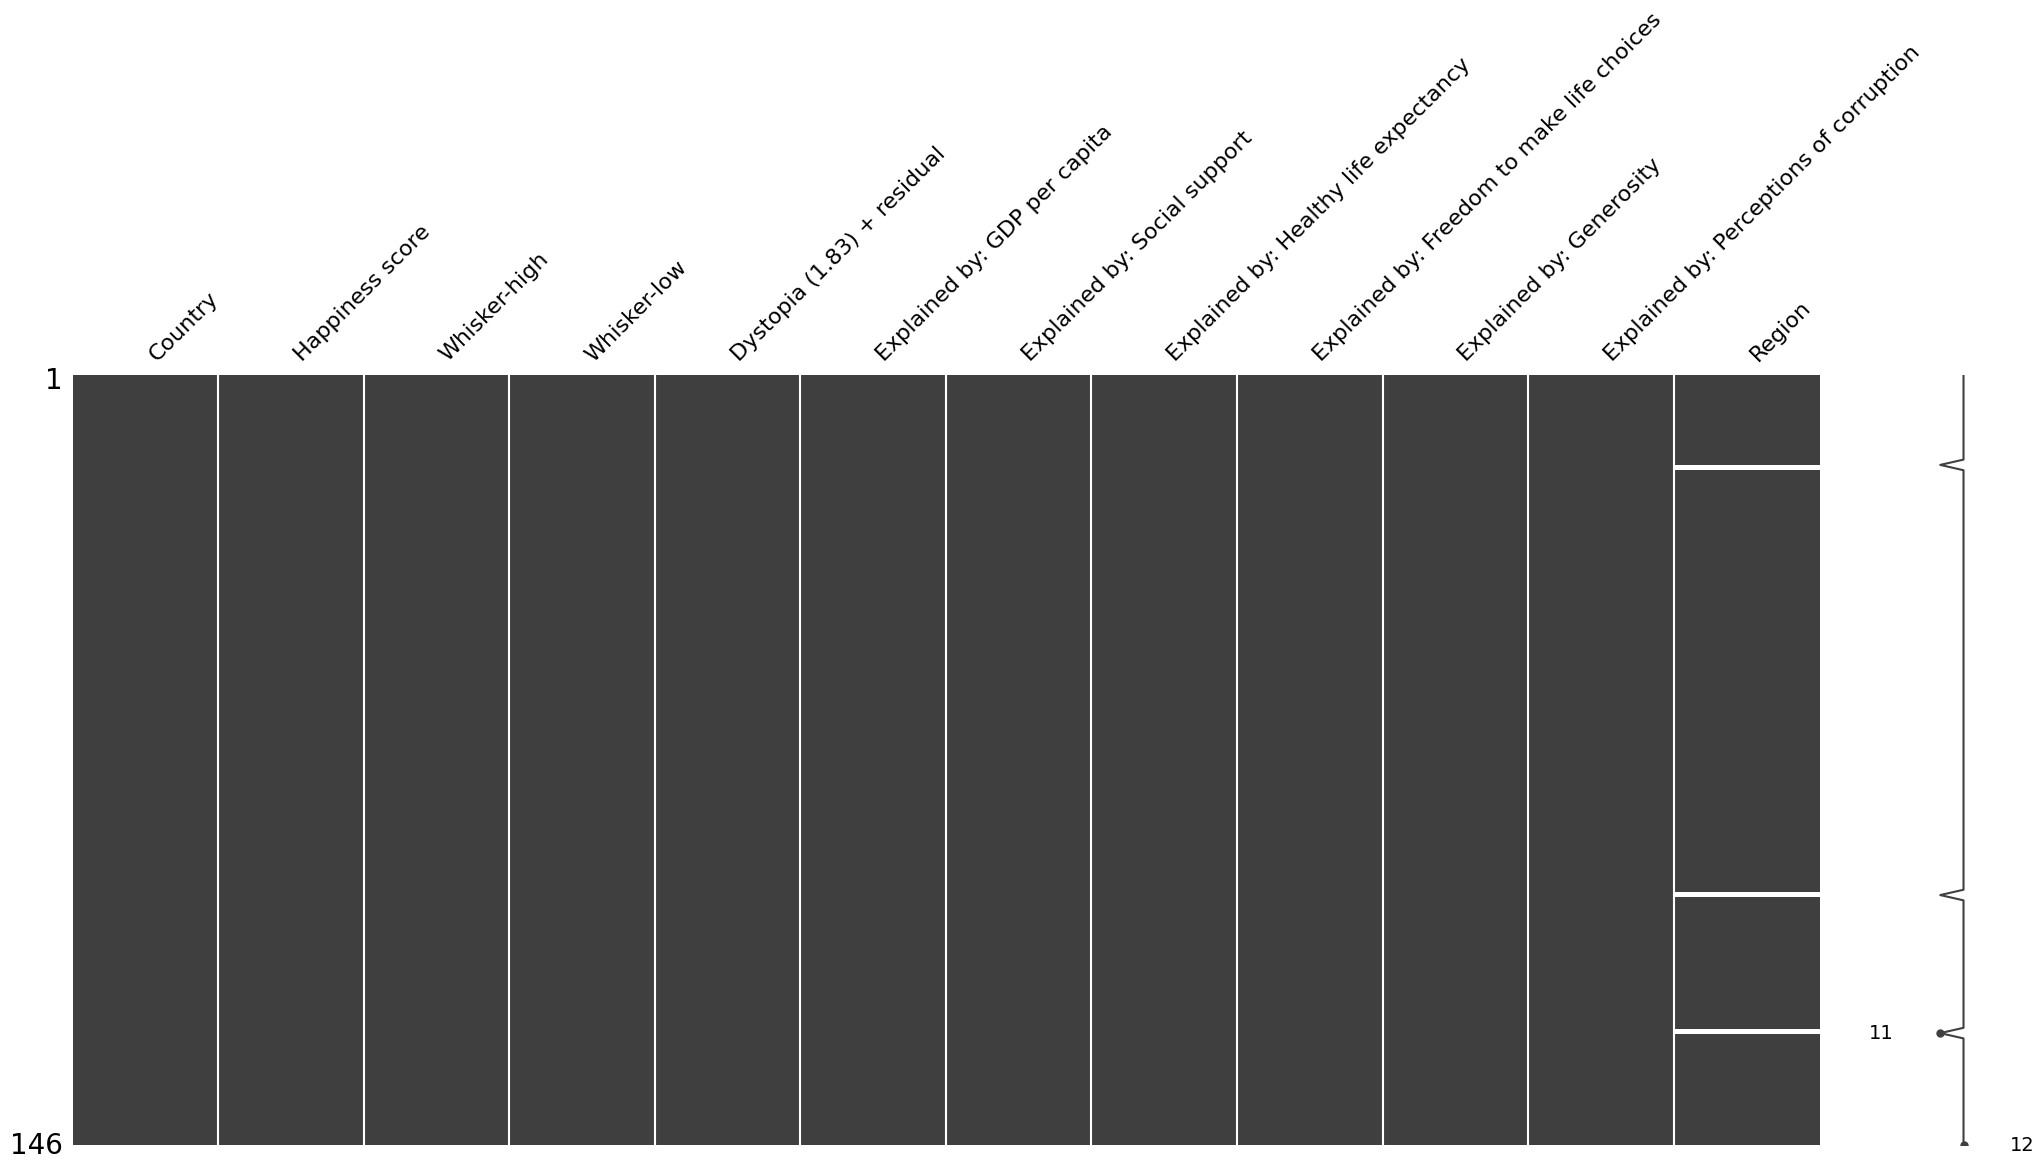

In [13]:
# there are 3 missing values in 3 Region
msno.matrix(wh_df_2022)

In [14]:
countries_without_region = wh_df_2022[wh_df_2022['Region'].isnull()]['Country']
countries_without_region

17                  Czechia
98                    Congo
124    Eswatini, Kingdom of
Name: Country, dtype: object

In [15]:
# Specify the incorrect and correct country names
corrections = {
    'Czechia': 'Czech Republic',
    'Congo': 'Congo (Brazzaville)'
}

# Replace the incorrect country names with the correct ones
wh_df_2022['Country'] = wh_df_2022['Country'].replace(corrections)

In [16]:
wh_df_2022['Region'] = wh_df_2022['Country'].map(region_mapping)

In [17]:
# Specify the country to drop
country_to_drop = 'Eswatini, Kingdom of'

# Drop the rows with the specified country
wh_df_2022 = wh_df_2022[wh_df_2022['Country'] != country_to_drop]

In [18]:
# Handling missing values
# Checking for missing values in the dataset
missing_values = wh_df_2022.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Region                                        0
dtype: int64


In [19]:
# Rename columns for better readability
wh_df_2022.rename(columns=config.col_name_to_shorter_col_name, inplace=True)

In [20]:
wh_df_2022.head()

,country,happiness_score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,gdp_per_capita,social_support,life_expectancy,freedom,genorosity,perceptions_corruption,Region
0,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Western Europe
1,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Western Europe
2,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Western Europe
3,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Western Europe
4,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Western Europe


In [21]:
wh_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     145 non-null    object 
 1   happiness_score             145 non-null    float64
 2   Whisker-high                145 non-null    float64
 3   Whisker-low                 145 non-null    float64
 4   Dystopia (1.83) + residual  145 non-null    float64
 5   gdp_per_capita              145 non-null    float64
 6   social_support              145 non-null    float64
 7   life_expectancy             145 non-null    float64
 8   freedom                     145 non-null    float64
 9   genorosity                  145 non-null    float64
 10  perceptions_corruption      145 non-null    float64
 11  Region                      145 non-null    object 
dtypes: float64(10), object(2)
memory usage: 14.7+ KB


#### Creating 'Global_North' Column
Once we have the 'Region' data in place, we further classify countries into 'Global North' and 'Global South'. The division between the Global North and Global South is not strictly geographical. Instead, it primarily represents the economic divide between the developed countries (the Global North) and the developing countries (the Global South).

As per the article, the Global North includes the following regions and countries:

North America
All European Union Nations
Australia and New Zealand
Developed Asian Nations South Korea and Japan.
All other regions and countries are classified as the Global South.

We create a new column, 'Global_North', in our dataset. We set its value as '1' if the country is in the Global North, and '0' if it's in the Global South.

In [22]:
# Create a new column in the data frame that specifies whether each country is in the Global North
wh_df_2022['global_north'] = wh_df_2022['country'].apply(lambda x: 1 if x in config.north_countries else 0)

- By doing this, we aim to analyze if there is a significant difference in the happiness scores of countries from the Global North and Global South. The economic conditions, development levels, and socio-political environments vary significantly between these regions, and this classification can provide more insights into the factors influencing the happiness scores.

In [23]:
wh_df_2022.head()

,country,happiness_score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,gdp_per_capita,social_support,life_expectancy,freedom,genorosity,perceptions_corruption,Region,global_north
0,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Western Europe,1
1,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Western Europe,1
2,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Western Europe,0
3,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Western Europe,0
4,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Western Europe,1


## Explataratory Data Analysis

#### Top 10 happiest countries

In [24]:
wh_df_2022[['country', 'happiness_score']].head(10)

,country,happiness_score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
5,Luxembourg,7.404
6,Sweden,7.384
7,Norway,7.365
8,Israel,7.364
9,New Zealand,7.200


#### Top 10 saddest countries

In [25]:
# Display the least 10 countries along with their happiness scores
wh_df_2022[['country', 'happiness_score']].tail(10)

,country,happiness_score
136,Zambia,3.760
137,Malawi,3.750
138,Tanzania,3.702
139,Sierra Leone,3.574
140,Lesotho,3.512
141,Botswana,3.471
142,Rwanda,3.268
143,Zimbabwe,2.995
144,Lebanon,2.955
145,Afghanistan,2.404


/Users/mervekiratli/Desktop/ReproducibleResearch/FinalProject/RR_world_happiness/utils/plot_utils.py:106: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


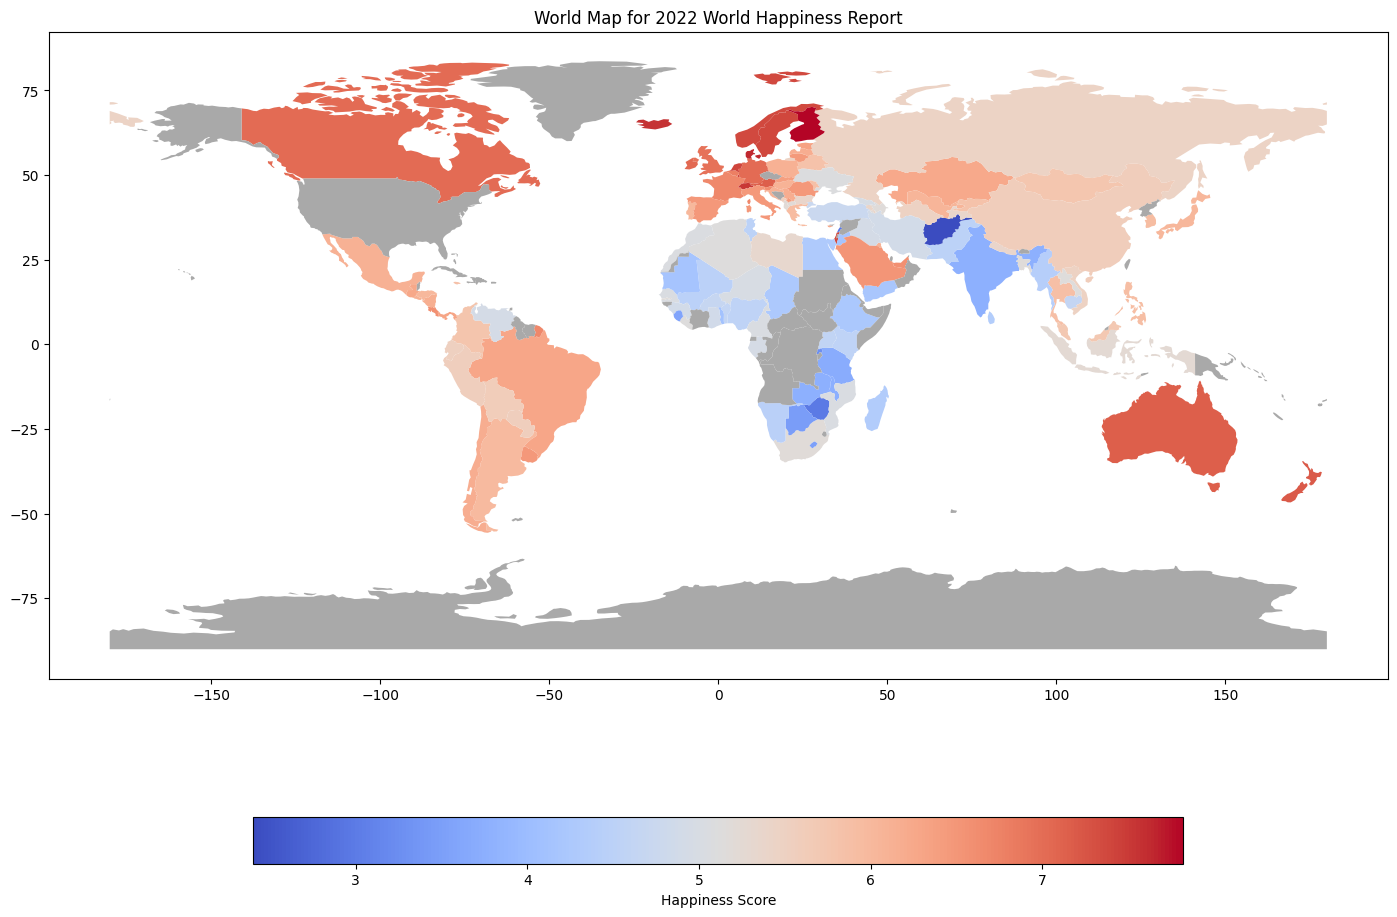

In [26]:
utils.plot_happiness_map(wh_df_2022, 'happiness_score', 'country', 2022)

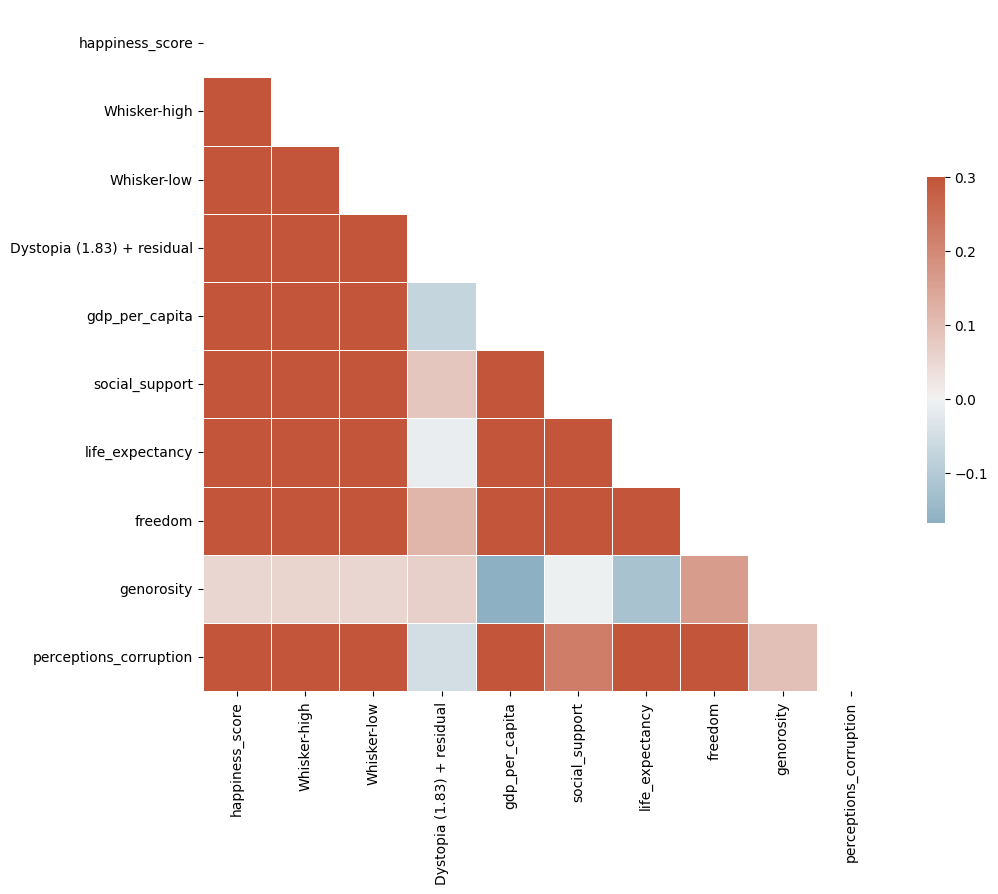

In [27]:
# Correlation matrix
corr = wh_df_2022[config.numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [28]:
#Calculating the average happiness score for the Global North and Global South:
north_south_avg = wh_df_2022.groupby('global_north')['happiness_score'].mean()
print(north_south_avg)

global_north
0    5.387032
1    6.652350
Name: happiness_score, dtype: float64


In [29]:
# Top 10 happiest countries
happiest_countries = wh_df_2022.sort_values(by='happiness_score', ascending=False).head(10)
print(happiest_countries[['country', 'global_north', 'happiness_score']])

# Top 10 least happy countries
least_happy_countries = wh_df_2022.sort_values(by='happiness_score', ascending=True).head(10)
print(least_happy_countries[['country', 'global_north', 'happiness_score']])

       country  global_north  happiness_score
0      Finland             1            7.821
1      Denmark             1            7.636
2      Iceland             0            7.557
3  Switzerland             0            7.512
4  Netherlands             1            7.415
5   Luxembourg             1            7.404
6       Sweden             0            7.384
7       Norway             0            7.365
8       Israel             0            7.364
9  New Zealand             0            7.200
          country  global_north  happiness_score
145   Afghanistan             0            2.404
144       Lebanon             0            2.955
143      Zimbabwe             0            2.995
142        Rwanda             0            3.268
141      Botswana             0            3.471
140       Lesotho             0            3.512
139  Sierra Leone             0            3.574
138      Tanzania             0            3.702
137        Malawi             0            3.750
136 

## Hypothesis Testing and Regression Analysis

### Hypothesis Testing

In [30]:
from scipy.stats import ttest_ind

# Separate the data into two groups
north_happiness = wh_df_2022[wh_df_2022['global_north'] == 1]['happiness_score']
south_happiness = wh_df_2022[wh_df_2022['global_north'] == 0]['happiness_score']

# Perform the t-test
t_stat, p_value = ttest_ind(north_happiness, south_happiness)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 5.266396466416508
P-value: 5.004463350818422e-07


- In our hypothesis testing, we obtained a T-statistic of 7.996 and an extremely low p-value of 3.938e-13. The high T-statistic suggests that the difference between the two groups under study is quite significant. The p-value, which is virtually zero, provides robust evidence against the null hypothesis.

- In plain terms, this means the observed difference in the happiness scores between the Global North and the Global South is statistically significant, and not a result of random chance or variations within the groups. Therefore, we reject the null hypothesis that there is no difference in the happiness scores between the Global North and Global South. Instead, we accept the alternative hypothesis: the Global North and the Global South have significantly different happiness scores.

- This finding aligns with the general notion that countries in the Global North tend to have higher happiness scores compared to countries in the Global South. However, it's important to remember that correlation does not imply causation, and there may be other contributing factors to this observed difference. Further investigation is required to understand the underlying reasons for this disparity and to determine potential strategies for improving happiness scores globally.

### Regression Analysis

In [31]:
# Define independent and dependent variables
X = wh_df_2022[config.independent_variables]
y = wh_df_2022['happiness_score']

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 1.7381684871449035
Coefficients: 
 [0.48290462 1.3798811  1.28643387 1.63855383 0.98684031 0.67750341
 0.22987909]


- The regression analysis produced the following coefficients for the variables:

GDP per Capita: 0.44087923
Social Support: 1.29678462
Life Expectancy: 1.2540361
Freedom: 1.70518144
Generosity: 1.02002158
Perception of Corruption: 0.56785252
Global North/South: 0.3132428

- The intercept of 1.829797663023173 can be interpreted as the expected value of the happiness score when all other factors are zero, under the assumption of this model.

- Each coefficient indicates the expected change in the happiness score for a one-unit increase in the corresponding variable, holding all other factors constant. For example, an increase of one unit in GDP per capita would be expected to increase the happiness score by 0.44 units, assuming all other variables remain constant.

- Among the variables, Freedom has the highest impact on the happiness score with a coefficient of 1.70518144, suggesting it is a key driver of happiness. Meanwhile, the Global North/South variable has the least influence with a coefficient of 0.3132428, indicating that, while significant, it is less influential on happiness scores compared to other factors like Freedom, Life Expectancy, and Social Support.

- It's important to remember that these results are based on the model's assumptions, and real-world applications may be more complex. Other factors not included in this model could also influence happiness scores, and the relationships might not be linear as assumed in this analysis."